In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0.5, 1.0, 'Prediction of Salary from years of experience')

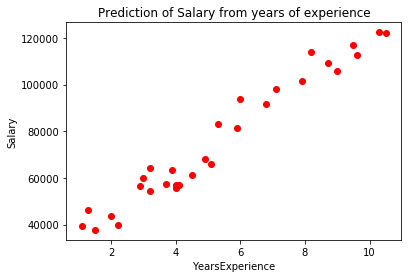

In [3]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Prediction of Salary from years of experience')

In [15]:
def normalize(x):
    min = x.min()
    max = x.max()
    y = (x-min)/(max-min)
    return y

In [16]:
data_final = normalize(data)

In [17]:
X = pd.DataFrame(data_final['YearsExperience'])
y = pd.DataFrame(data_final['Salary'])

In [18]:
X = data_final['YearsExperience'].values.reshape(-1,1)
y = data_final['Salary'].values.reshape(-1,1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = lr.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.356804,0.399197
1,1.000000,1.027257
2,0.935956,0.934211
3,0.301051,0.282890
4,0.846917,0.841165
5,0.019041,-0.042770
6,0.315545,0.201475
7,0.264812,0.178213
8,0.801453,0.876057


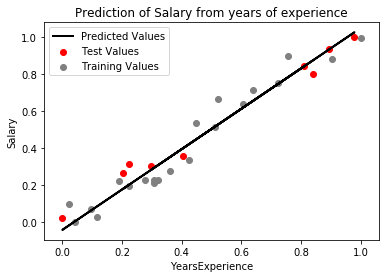

In [23]:
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Predicted Values')
plt.scatter(X_test, y_test,  color='red', label='Test Values')
plt.scatter(X_train,y_train, color='grey', label='Training Values')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Prediction of Salary from years of experience')
leg = plt.legend();
plt.show()

In [24]:
mse=mean_squared_error(y_test,y_pred)
r2_square = r2_score(y_test,y_pred)

In [25]:
print('Mean Squared Error : ',mse)
print('R2_Square : ',r2_square)
print('Accurarcy of model : ',r2_square*100)

Mean Squared Error :  0.003644864557900639
R2_Square :  0.9678098662339668
Accurarcy of model :  96.78098662339669


In [28]:
lr.score(X_test,y_test)

0.9678098662339668